## Some Physical Constants :

$a_0$ = Bohr's Radius = $5.29$ x $10^{-11}$ m


# Schrödinger Equation
Potential Energy in Hydrogen Atom:
$$V(r) = -\frac{e^2}{4\pi\epsilon_0r}$$
The time-independent Schrödinger equation is:

$$ \hat{H}\psi = E\psi$$

Hamiltonian Operator:
$$ \hat{H} = -\frac{\hslash^2}{2m}\nabla^2 + V(r) $$

Substitute Coulomb Potential V:
$$ -\frac{\hslash^2}{2m}\nabla^2\psi - \frac{e^2}{4\pi\epsilon_0r}\psi = E\psi $$

# Quantum Numbers

* #####  Principal Quantum Number $n$
$$n = 1,2,3,4,....$$

Controls: Energy and Overall Size

Energy : 
$$ E_n = -\frac{13.6eV}{n^2}$$

* #####  Angular momentum quantum number $l$
$$ l = 0,1,2,3,...,n-1 $$
Controls Shape

* #####  Magnetic quantum number $m$
$$ m = -l,...,+l $$

#### Angular Part - Spherical Harmonics

$$ Y^m_{l}(\theta,\phi) = \sqrt{\frac{(2l+1)(l-m)!}{4\pi(l+m)!}}P^m_{l}(\cos\theta)e^{im\phi} $$

These produce the lobes we see
Example:
* $l$ = 0 - Sphere
* $l$ = 1 - dumbell

#### Radial Solution 
Radial Function:

$$ R_{nl}(r) = \sqrt{(\frac{2}{na_0})^3\frac{(n-l-1)!}{2n(n+l)!}} e^{-r/(na_0)} (\frac{2r}{na_0})^l   L^{2l+1}_{n-l-1} (\frac{2r}{na_0})$$

### Full Wave Function

$$ \psi_{nlm} = R_{nl}(r)Y^m_l(\theta,\phi)$$
This gives probability of finding electron at that point.

Nodes appear when $ \psi = 0 $
Two Types of Nodes :
* Radial Nodes --> $n-l-1$
* Angular Nodes ---> $l$

Total Nodes = $ n-1 $

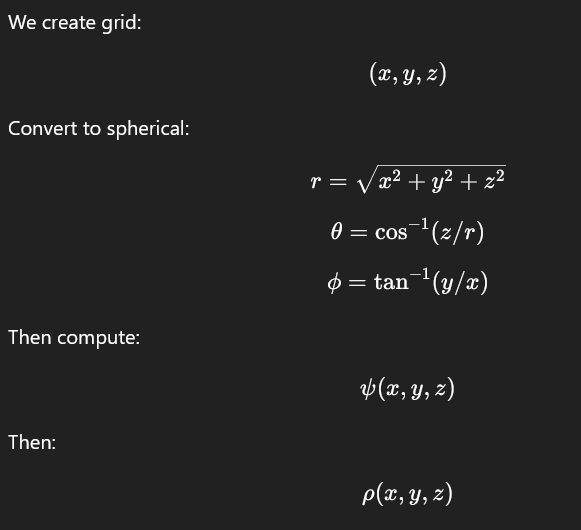

scipy.special.sph_harm

scipy.special.genlaguerre

Compute exact mathematical Functions


#### Our wave Function exists in 3D Space
$$ \psi(x,y,x) $$
We make $z$= 0 for 2d Simulation

#### Probability density :
$$ \rho(x,y) = |\psi(x,y,0)|^2 $$

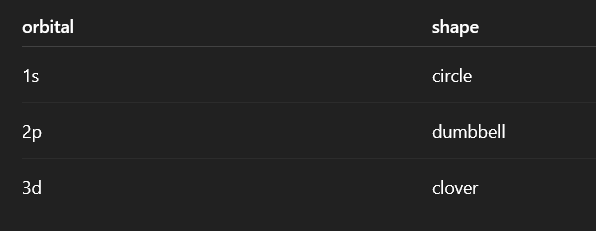

### Mathematics :
$$ (x,y) \to r,\theta, \phi \to R_{nl}(r) \to Y^m_l(\theta,\phi) \to \psi \to |\psi|^2 $$

## Python Equivalent:

grid $\to$ r

grid $\to$ $\theta$

grid $\to$ $\phi$
compute radial

compute spherical harmonic

multiply

abs square

plot



### Spherical harmonic
$$ Y^m_l $$

#### Python:
```shell
 scipy.special.sph_harm


### Laguerre polynomial
$$L$$

#### Python:
```shell
scipy.special.genlaguerre



### Mathematical definition of grid
Define a square region:
$$ x \in [-L, L] $$
$$ y \in [-L, L] $$

Where:
* $L$ = Spatial Boundary
$$ L = 10a_0 $$
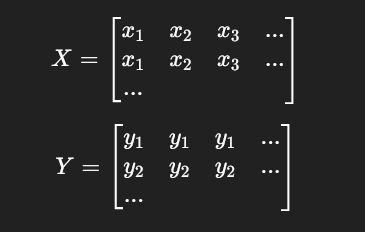

Each element represents one spatial coordinate.

### $\theta$ for 2D Slice
Since:
$$z = 0$$

So:
$$\Theta = \frac{\pi}{2}$$

### Compute Probability Density Matrix
$$\rho = |\Psi|^2 $$
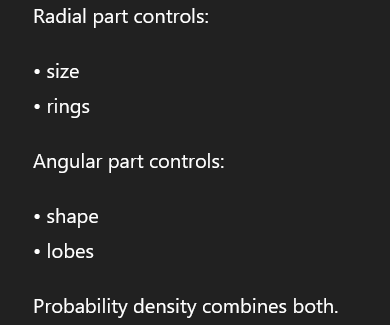

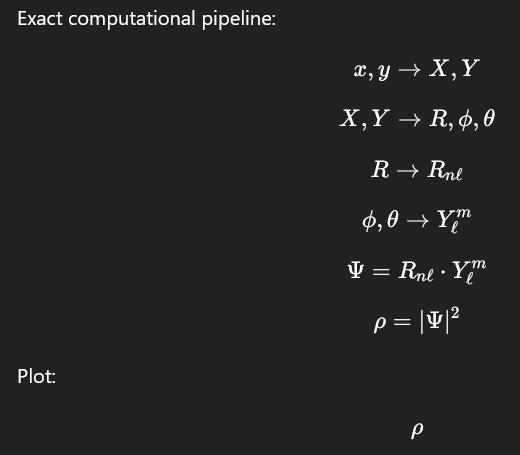

| Math object         | Python function           |
| ------------------- | ------------------------- |
| mesh grid           | numpy.meshgrid            |
| sqrt                | numpy.sqrt                |
| atan2               | numpy.arctan2             |
| factorial           | math.factorial            |
| Laguerre polynomial | scipy.special.genlaguerre |
| spherical harmonic  | scipy.special.sph_harm    |
| magnitude squared   | numpy.abs                 |


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import genlaguerre
from math import factorial
# compatibility wrapper for spherical-harmonic API across SciPy versions
try:
    from scipy.special import sph_harm
except Exception:
    from scipy.special import sph_harm_y as _sph_harm_y
    def sph_harm(m, l, phi, theta):
        return _sph_harm_y(l, m, theta, phi)

plt.style.use('dark_background')

In [97]:
# Quick check of scipy.special spherical-harmonic names and signature
import scipy.special as sp
print('sph_harm' in dir(sp), 'sph_harm_y' in dir(sp), 'sph_harm_y_all' in dir(sp))
print('\nscipy.special.sph_harm signature and first line of doc:')
import inspect
print(inspect.signature(sp.sph_harm))
print(sp.sph_harm.__doc__.splitlines()[0])

False True True

scipy.special.sph_harm signature and first line of doc:


AttributeError: module 'scipy.special' has no attribute 'sph_harm'

| Library     | Purpose                |
| ----------- | ---------------------- |
| numpy       | numerical math, arrays |
| matplotlib  | plotting               |
| genlaguerre | Laguerre polynomial    |
| factorial   | normalization constant |


In [98]:
# Define the radial wavefunction for the hydrogen atom
def radial_function(n, l ,r):
    normalization = np.sqrt((2/n)**3)*np.sqrt(factorial(n-l-1)/(2*n* factorial(n+l+1)))
    exponential = np.exp(-r/n)
    rho = 2*r/n
    power = rho**l
    laguerre = genlaguerre(n-l-1, 2*l +1)(rho)
    return normalization * exponential * power * laguerre
    
    

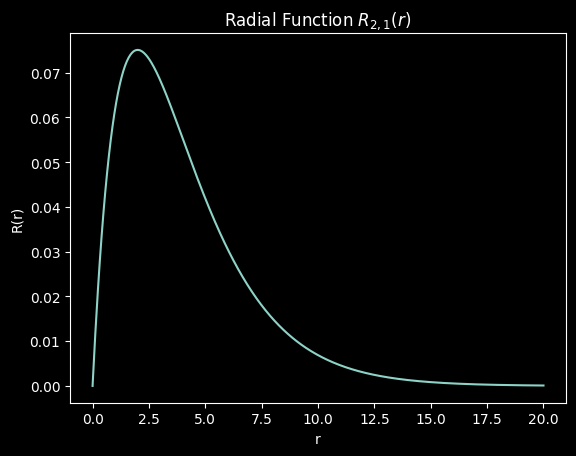

In [99]:
r = np.linspace(0, 20, 500)
R = radial_function(2, 1, r)
plt.plot(r, R)
plt.title("Radial Function $R_{2,1}(r)$")
plt.xlabel("r")
plt.ylabel("R(r)")
plt.show()

| Variable | Meaning                 |
| -------- | ----------------------- |
| $l $       | angular quantum number  |
|$ m $       | magnetic quantum number |
| $\theta  $  | polar angle             |
|$ \phi$      | azimuthal angle         |


In [100]:
# prefer public `sph_harm`; fall back to SciPy's `sph_harm_y` if `sph_harm` isn't present
try:
    from scipy.special import sph_harm
except ImportError:
    from scipy.special import sph_harm_y as _sph_harm_y
    def sph_harm(m, l, phi, theta):
        # map to sph_harm_y(n, m, theta, phi)
        return _sph_harm_y(l, m, theta, phi)

plt.style.use('dark_background')

#from scipy.special import sph_harm_y_all




In [101]:
def angular_function(l, m, theta, phi):

    if l == 0 and m == 0:
        return np.full_like(theta, 1/np.sqrt(4*np.pi), dtype=np.complex128)

    # use compatibility-wrapped sph_harm for a single (l,m)
    return sph_harm(m, l, phi, theta)


In [116]:
import matplotlib.pyplot as plt
import numpy as np

#Grid Size
N = 500

#Physical Size
L = 15.0

x = np.linspace(-L, L, N)
z = np.linspace(-L, L, N)

X, Z = np.meshgrid(x, z)
Y = np.zeros_like(X)


### Convert Cartesian $\to$ Spherical

$$ r = \sqrt{x^2+y^2} $$
$$ \phi = tan^{-1}(y/x) $$
$$ \theta = \frac{\pi}{2} $$

In [118]:
# spherical coordinates for y=0 slice
R = np.sqrt(X**2 + Y**2 + Z**2)
Phi = np.arctan2(Y, X)
Theta = np.arccos(np.clip(Z / (R + 1e-16), -1.0, 1.0))


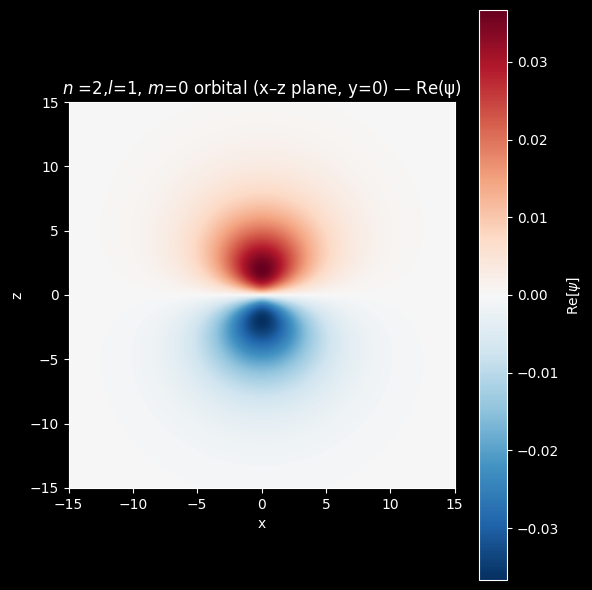

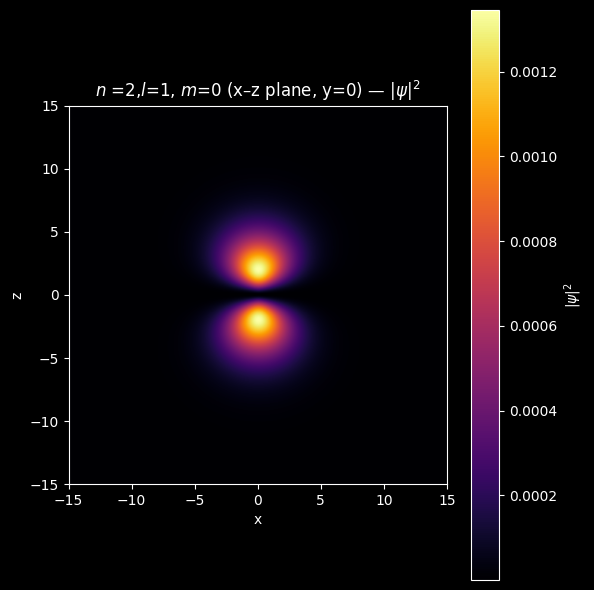

In [124]:

# orbital quantum numbers for orbital
n = 2
l = 1
m = 0

radial = radial_function(n, l, R)
angular = angular_function(l, m, Theta, Phi)
psi = radial * angular

density = np.abs(psi)**2

# plot signed real part to show positive/negative lobes
plt.figure(figsize=(6,6))
plt.imshow(np.real(psi),
           extent=[X.min(), X.max(), Z.min(), Z.max()],
           origin='lower',
           cmap='RdBu_r')
plt.colorbar(label=r'Re[$\psi$]')
plt.title(f'$n$ ={n},$l$={l}, $m$={m} orbital (x–z plane, y=0) — Re(ψ)')
plt.xlabel('x')
plt.ylabel('z')
plt.tight_layout()
plt.show()

# also show probability density
plt.figure(figsize=(6,6))
plt.imshow(density,
           extent=[X.min(), X.max(), Z.min(), Z.max()],
           origin='lower',
           cmap='inferno')
plt.colorbar(label=r'$|\psi|^2$')
plt.title(f'$n$ ={n},$l$={l}, $m$={m} (x–z plane, y=0) — $|\psi|^2$')
plt.xlabel('x')
plt.ylabel('z')
plt.tight_layout()
plt.show()